## Import Libraries

In [74]:
import pandas as pd
from IPython.display import display, HTML
import re
import nltk
from nltk.corpus import stopwords
import os

## LoadData

In [62]:
col=['Text']
lda = pd.read_csv('/Users/harsha/Documents/cse635_AIR/Project/Main/Data/LDA.tsv', delimiter ='\t', quoting = 3)

In [31]:
lda['text_processed'] = lda['Text'].map(lambda x: re.sub('[,\.!?\b\d+\b]', ' ', x))
lda['text_processed'] = lda['text_processed'].map(lambda x: x.lower())
lda['text_processed'] = lda['text_processed'].map(lambda x: ' '.join([word for word in x.split() if not word in set(stopwords.words('english'))]))

## Cleaning the dataset

In [63]:
def cleanAndGenCorpus(dataset):
    corpus =[]
    for i in range(0,dataset['Text'].size):
        text= re.sub('[^a-zA-z&]',' ',dataset['Text'][i])
        text= text.lower()
        text= text.split()
        text= [word for word in text if not word in set(stopwords.words('english'))]
        text= ' '.join(text)
        corpus.append(text)
    return corpus

In [64]:
corpus = cleanAndGenCorpus(lda)

## Generate WordCloud

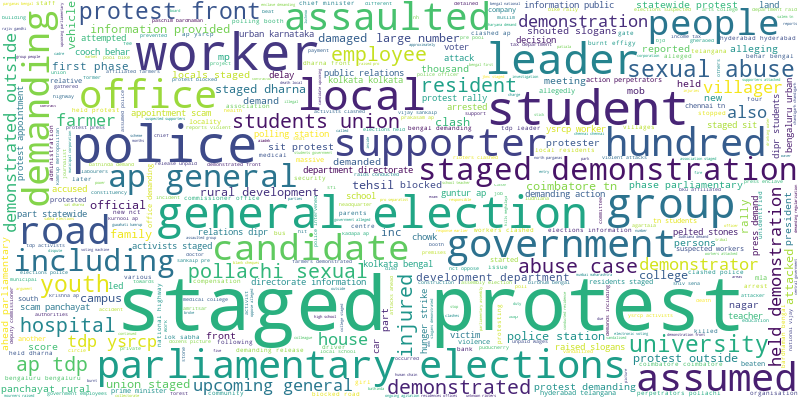

In [82]:
from wordcloud import WordCloud
long_string = ','.join(list(corpus))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue',width=800, height=400,stopwords=['report'])
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

## Generate top words

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:286: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['size'] not in stop_words.
  sorted(inconsistent))


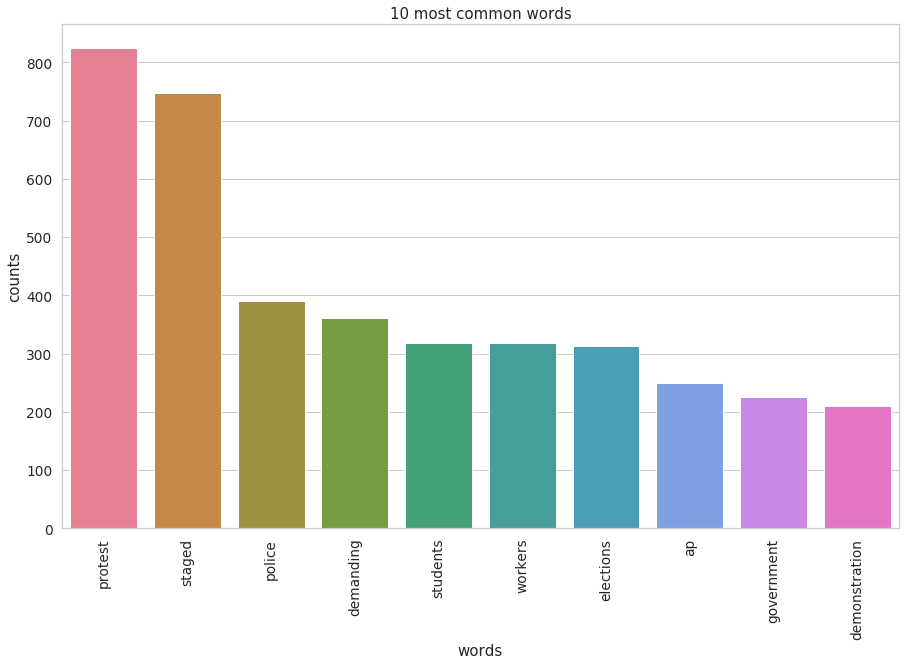

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(corpus)
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

## Generate LDA Topics

In [ ]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

## Visualize LDA

In [ ]:
import pyLDAvis
from pyLDAvis import sklearn as sklearn_lda

pyLDAvis.enable_notebook()
LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
pyLDAvis.show(LDAvis_prepared)